# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [51]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [52]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [53]:
# load and read file
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)

# look at dimensions
df.shape

# look at first few columns
df.head

<bound method NDFrame.head of           country  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.168690        0.450662   
1     Afghanistan  2009     4.401778            7.333790        0.552308   
2     Afghanistan  2010     4.758381            7.386629        0.539075   
3     Afghanistan  2011     3.831719            7.415019        0.521104   
4     Afghanistan  2012     3.782938            7.517126        0.520637   
...           ...   ...          ...                 ...             ...   
1557     Zimbabwe  2013     4.690188            7.565154        0.799274   
1558     Zimbabwe  2014     4.184451            7.562753        0.765839   
1559     Zimbabwe  2015     3.703191            7.556052        0.735800   
1560     Zimbabwe  2016     3.735400            7.538829        0.768425   
1561     Zimbabwe  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make l

In [54]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [55]:
#one-hot encode check
# find columns containing string values
df.dtypes


country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [56]:
to_encode = list(df.select_dtypes(include=['object']).columns)

In [57]:
#I want to know the life ladder of different countries so I will keep it and try to one-hot encode
df[to_encode].nunique()

country    164
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(handle_unknown = 'error', sparse = False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
                      
# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names(to_encode)
                 

In [59]:
df_enc.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df.drop(to_encode, axis = 1, inplace=True)
df.head()
df = df.join(df_enc)
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect',
       ...
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan',
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=182)

In [61]:
#getting rid of columns that are kind of irrelevant
info_repeated = ['Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year']
#I specifically chose the last 2 because they had repeated info and had the most missing values
df.drop(columns=info_repeated, axis=1, inplace=True)

In [62]:
# getting rid of missing values
nan_count = df.isnull().sum()
nan_count

year                                 0
Life Ladder                          0
Log GDP per capita                  27
Social support                      13
Healthy life expectancy at birth     9
                                    ..
country_Venezuela                    0
country_Vietnam                      0
country_Yemen                        0
country_Zambia                       0
country_Zimbabwe                     0
Length: 179, dtype: int64

In [63]:
nan_detected = nan_count != 0
nan_detected

year                                False
Life Ladder                         False
Log GDP per capita                   True
Social support                       True
Healthy life expectancy at birth     True
                                    ...  
country_Venezuela                   False
country_Vietnam                     False
country_Yemen                       False
country_Zambia                      False
country_Zimbabwe                    False
Length: 179, dtype: bool

In [64]:
is_int_or_float = df.dtypes.isin([np.int64, np.float64])
is_int_or_float

year                                False
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
                                    ...  
country_Venezuela                   False
country_Vietnam                     False
country_Yemen                       False
country_Zambia                      False
country_Zimbabwe                    False
Length: 179, dtype: bool

In [65]:
to_impute =  nan_detected & is_int_or_float# YOUR CODE HERE
to_impute

year                                False
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
                                    ...  
country_Venezuela                   False
country_Vietnam                     False
country_Yemen                       False
country_Zambia                      False
country_Zimbabwe                    False
Length: 179, dtype: bool

In [66]:
df.columns[to_impute]

Index([], dtype='object')

In [67]:
# I will impute the values that are missing 100+
to_impute_selected = ['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate), average 2000-15']

In [68]:
for colname in to_impute_selected:
    # YOUR CODE HERE - complete the loop
    df[colname + 'na'] = df[colname].isnull()
    mean_value=df[colname].mean()
    df[colname].fillna(mean_value, inplace=True)
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Healthy life expectancy at birthna,Freedom to make life choicesna,Generosityna,Perceptions of corruptionna,Positive affectna,Negative affectna,Confidence in national governmentna,Democratic Qualityna,Delivery Qualityna,"GINI index (World Bank estimate), average 2000-15na"
0,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,...,False,False,False,False,False,False,False,False,False,True
1,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,...,False,False,False,False,False,False,False,False,False,True
2,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,...,False,False,False,False,False,False,False,False,False,True
3,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,...,False,False,False,False,False,False,False,False,False,True
4,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,...,False,False,False,False,False,False,False,False,False,True


In [69]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))


Log GDP per capita missing values count :0
Social support missing values count :0
Healthy life expectancy at birth missing values count :0
Freedom to make life choices missing values count :0
Generosity missing values count :0
Perceptions of corruption missing values count :0
Positive affect missing values count :0
Negative affect missing values count :0
Confidence in national government missing values count :0
Democratic Quality missing values count :0
Delivery Quality missing values count :0
GINI index (World Bank estimate), average 2000-15 missing values count :0


In [70]:
#create training and test data
X = df.drop('Life Ladder', axis=1)
y = df['Life Ladder']
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 1562

Number of Features:190
['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'GINI index (World Bank estimate), average 2000-15', 'country_Afghanistan', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahrain', 'country_Bangladesh', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bhutan', 'country_Bolivia', 'country_Bosnia and Herzegovina', 'country_Botswana', 'country_Brazil', 'country_Bulgaria', 'country_Burkina Faso', 'country_Burundi', 'country_Cambodia', 'country_Cameroon', 'country_Canada', 'country_Central African Republic', 'country_Cha

In [71]:
#we are going to split data and test with 4 models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

In [72]:
from sklearn.ensemble import StackingRegressor
estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

In [73]:
stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

In [74]:
print('Performing Cross-Validation...')


# YOUR CODE HERE
rmse_avg = np.mean(-cross_val_score(stacking_model, X_train, y_train, cv=3, scoring = 'neg_root_mean_squared_error' ))

print('End')
print('average score: {}'.format(rmse_avg))

Performing Cross-Validation...
End
average score: 508776.6144040038


In [75]:
max_depth_value = 8
n_estimators_value = 100
decision_tree_regressor = DecisionTreeRegressor(max_depth=max_depth_value)
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=n_estimators_value)
random_forest_regressor = RandomForestRegressor()
linear_regression = LinearRegression()

estimators_best = [
     ("DT", decision_tree_regressor),
    ("RF", random_forest_regressor),
    ("GBDT", gradient_boosting_regressor),
    ("LR", linear_regression)
]

In [76]:
print('Implement Stacking...')

# YOUR CODE HERE
stacking_best_model = StackingRegressor(estimators=estimators_best)
stacking_best_model.fit(X_train, y_train)
print('End')

Implement Stacking...
End


In [77]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
# YOUR CODE HERE
stacking_best_pred = stacking_best_model.predict(X_test)
# 2. Compute the RMSE using mean_squared_error()
# YOUR CODE HERE
rmse = mean_squared_error(y_test, stacking_best_pred, squared=False )
# 3. Compute the R2 score using r2_score()
# YOUR CODE HERE
r2 = r2_score(y_test, stacking_best_pred)
           
print('Root Mean Squared Error: {0}'.format(rmse))
print('R2: {0}'.format(r2))                       

Root Mean Squared Error: 16615.935532907668
R2: -216731320.60206276


In [78]:
# 1. Create the LinearRegression model object below and assign to variable 'lr_model'
# YOUR CODE HERE
lr_model = LinearRegression()
# 2. Fit the model to the training data below
# YOUR CODE HERE
lr_model.fit(X_train, y_train)
# 3.  Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_lr_pred'
# YOUR CODE HERE
y_lr_pred = lr_model.predict(X_test)
# 4: Compute the RMSE and R2 (on y_test and y_lr_pred) and save the results to lr_rmse and lr_r2
# YOUR CODE HERE
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.34419812747988865
[LR] R2: 0.9069986851027855


In [79]:
# 1. Create the DecisionTreeRegressor model object using the hyperparameter values above and assign to 
# variable 'dt_model'
# YOUR CODE HERE
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 50)
# 2. Fit the model to the training data below
# YOUR CODE HERE
dt_model.fit(X_train, y_train)
# 3.  Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_dt_pred'
# YOUR CODE HERE
y_dt_pred = dt_model.predict(X_test)
# 4: Compute the RMSE and R2 (on y_test and y_dt_pred) and save the results to dt_rmse and dt_r2
# YOUR CODE HERE
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))


[DT] Root Mean Squared Error: 0.5231097230538148
[DT] R2: 0.7851884311743985


In [80]:
print('Begin GBDT Implementation...')

# 1. Create the  GradientBoostingRegressor model object below and assign to variable 'gbdt_model'
# YOUR CODE HERE
gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
# 2. Fit the model to the training data below
# YOUR CODE HERE
gbdt_model.fit(X_train, y_train)
# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_gbdt_pred'
# YOUR CODE HERE
y_gbdt_pred = gbdt_model.predict(X_test)
# 4. Compute the RMSE and R2 (on y_test and y_gbdt_pred) and save the results to gbdt_rmse and gbdt_r2
# YOUR CODE HERE
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)          

print('End')

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 




Begin GBDT Implementation...
End
[GBDT] Root Mean Squared Error: 0.3977353165305977
[GBDT] R2: 0.8758175015841282


In [81]:
print('Begin RF Implementation...')

# 1. Create the  RandomForestRegressor model object below and assign to variable 'rf_model'
# YOUR CODE HERE
rf_model=RandomForestRegressor(max_depth=32, n_estimators=300)
# 2. Fit the model to the training data below
# YOUR CODE HERE
rf_model.fit(X_train, y_train)
# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_rf_pred'
# YOUR CODE HERE
y_rf_pred = rf_model.predict(X_test)
# 4. Compute the RMSE and R2 (on y_test and y_rf_pred) and save the results to rf_rmse and rf_r2
# YOUR CODE HERE
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('End')

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


Begin RF Implementation...
End
[RF] Root Mean Squared Error: 0.36450488473197634
[RF] R2: 0.8957013258836168


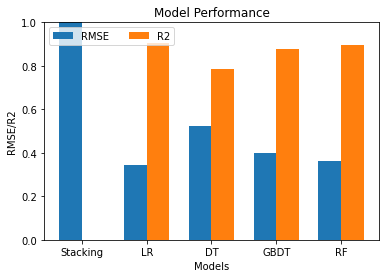

In [82]:
RMSE_Results = [rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, RMSE_Results, width, label="RMSE")

# 2. Create bar plot with R2 results
# YOUR CODE HERE
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel("Models")
plt.ylabel("RMSE/R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


In [83]:
#viewing this, I have various of options to choose but I think LR is best here

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)
X_train.head()

In [88]:
# 1. Create the  Scikit-learn LogisticRegression model object below and assign to variable 'model_default'
# YOUR CODE HERE
model_default = LogisticRegression(max_iter=1000, C=1.0)
# 2. Fit the model to the training data below
# YOUR CODE HERE
model_default.fit(X_train, y_train)
# 1. Make predictions on the test data using the predict_proba() method
# YOUR CODE HERE
proba_predictions_default = model_default.predict_proba(X_test)[:,1].tolist()
# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_default = model_default.predict(X_test)

ValueError: Unknown label type: 'continuous'

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [ ]:
# I DID ABOVE and I changed my label to "life ladder"

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [ ]:
# YOUR CODE HERE